# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [1]:
project_data = pd.read_csv('C://Berly/ML/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('C://Berly/ML/Assignments_DonorsChoose_2018/resources.csv')

NameError: name 'pd' is not defined

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.head(2)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [7]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories  
0        23             Literacy_Language  
1         1  History_Civics Health_Sports

## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Preprocessing of project_grade_category

In [9]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
# similarly you can preprocess the project grade category also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = decontracted(sentance)
    sent=sent.replace('Grades'," ")

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 61008.31it/s]


In [11]:
#Preprocessing needed for categorial item grade 

grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python



grade_cat_list = []
for i in grade_catogories:
    temp = ""
   #splitting values in the list for getting grades
    for j in i.split(','): # it will split 
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp=temp.rstrip(' ')#
        temp = temp.replace('-','_')
        temp = temp.replace(' ','_')#replacing spaces
        
    grade_cat_list.append(temp.strip())
    

In [12]:
#inserting  processed grade category into project data and dropping old column
project_data['clean_grade'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade  
0  Grades_PreK_2  
1     Grades_6_8

## 1.5 Preprocessing of teacher-prefix

In [13]:
#Preprocessing needed for categorial item grade 

prefix_catogories = list((project_data['teacher_prefix']).values)

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prefix_cat_list = []

for i in prefix_catogories:
    temp = ""
   #splitting values in the list for getting grades
    for j in str(i).split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('nan',' ')#replacing spaces
    prefix_cat_list.append(temp.strip())

In [14]:
#inserting  processed prefix category into project data and dropping old column

project_data['clean_prefix'] = prefix_cat_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  
0  Grades_PreK_2         Mrs.  
1     Grades_6_8          Mr.

## 1.6 Text preprocessing-Project Essay

In [15]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [16]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  \
0  Grades_PreK_2         Mrs.   
1     Grades_6_8          Mr.   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [ ]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:52<00:00, 975.03it/s]


In [24]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='black'> 1.6 Preprocessing of `project_title`</font></h2>

In [25]:
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [26]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('!@#$%^&*()[]{};:,./<>?\|`~-=_+', ' ')
    
    
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 21275.72it/s]


In [27]:
# printing some random titles after text preprocessing.
print(preprocessed_title[0])
print("="*50)
print(preprocessed_title[150])
print("="*50)
print(preprocessed_title[1000])
print("="*50)
print(preprocessed_title[20000])
print("="*50)
print(preprocessed_title[99999])
print("="*50)

educational support english learners home
more movement hokki stools
sailing into super 4th grade year
we need to move it while we input it
inspiring minds enhancing educational experience


In [28]:
#Adding processed columns at place of original columns
project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [29]:
#Adding processed title as clean title in project
project_data['clean_title'] = preprocessed_title

In [30]:
#Printing data count in project data
print(project_data.count())

#Because of memory constraints linear sampling of whole data and considering 50 k data for analysis
#project_data=project_data.sample(n=50000,replace="False")
#print("*"*50)
#print(project_data.count())

Unnamed: 0                                      109248
id                                              109248
teacher_id                                      109248
school_state                                    109248
project_submitted_datetime                      109248
project_title                                   109248
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
price                                           109248
quantity                                        109248
clean_categories                                109248
clean_subcategories                             109248
clean_grade                                     109248
clean_prefix                                    109248
essay                                           109248
clean_essays                                    109248
clean_title                                     109248
dtype: int

In [31]:
#To view count of data set in each class for approved and rejected projects

filtered_negative = project_data.loc[project_data['project_is_approved'] == 0]
filtered_positive = project_data.loc[project_data['project_is_approved'] == 1]
print(filtered_negative.count())
print(filtered_positive.count())

Unnamed: 0                                      16542
id                                              16542
teacher_id                                      16542
school_state                                    16542
project_submitted_datetime                      16542
project_title                                   16542
project_resource_summary                        16542
teacher_number_of_previously_posted_projects    16542
project_is_approved                             16542
price                                           16542
quantity                                        16542
clean_categories                                16542
clean_subcategories                             16542
clean_grade                                     16542
clean_prefix                                    16542
essay                                           16542
clean_essays                                    16542
clean_title                                     16542
dtype: int64
Unnamed: 0     

# Summary

Results showing most of the project is approved

## 2.Splitting of data

In [32]:
#finding the possible values for project approval.results shows if project is approved it will show 1 and rejected shows 0
y = project_data['project_is_approved'].values
#Dropping the column project approved from project data
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
#Projecting project data to see whether is project_is_approved column is there or not
X.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  price  quantity  \
0                                             0  154.6        23   
1                                             7  299.0         1   

               clean_categories           clean_subcategories    clean_grade  \
0             Literacy_Language                  ESL Literacy  Grades_PreK_2   
1  History_Civics Health_Sports  Civics_Government TeamSports     Grades_6_8   

  clean_prefix                                              essay  \
0         Mrs.  My students are English learners that are work...   
1          Mr.  Our students arrive to our school eager to lea...   

                                        clean_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   

                                 clean_title  
0  educational support english learners home  
1           wanted projector hungry learners

In [33]:

#Splitting of data set into train test and cv after precprocessing.if this is done before pre processing data leakage will happen
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
#printing sample count of train,test and cv data for column id
print(X_train['id'].count())
print(X_test['id'].count())
print(X_cv['id'].count())
#Sample value of y in all types of data
print(y_train)
print(y_test)
print(y_cv)




49041
36052
24155
[1 1 0 ... 1 1 1]
[0 1 0 ... 0 1 1]
[1 1 1 ... 1 0 1]


In [34]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)


## 3 Vectorizing data 

### 3.1 Vectorizing Categorical data

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### one hot encoding the catogorical features: clean_categories

In [35]:
vectclean = CountVectorizer()
vectclean.fit(X_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectclean.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectclean.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectclean.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectclean.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


###  one hot encoding the catogorical features: clean_subcategories

In [36]:
vectcleansub = CountVectorizer()
vectcleansub.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectcleansub.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat_ohe = vectcleansub.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectcleansub.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_cv_clean_subcat_ohe.shape, y_cv.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectcleansub.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### one hot encoding the catogorical features: teacher_prefix

In [37]:
vectprefix = CountVectorizer()
vectprefix.fit(X_train['clean_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectprefix.transform(X_train['clean_prefix'].values)
X_cv_teacher_ohe = vectprefix.transform(X_cv['clean_prefix'].values)
X_test_teacher_ohe = vectprefix.transform(X_test['clean_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectprefix.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


###  one hot encoding the catogorical features: school_state

In [38]:
vectstate = CountVectorizer()
vectstate.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectstate.transform(X_train['school_state'].values)
X_cv_state_ohe = vectstate.transform(X_cv['school_state'].values)
X_test_state_ohe = vectstate.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectstate.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### one hot encoding the catogorical features: project_grade_category

In [39]:

vectgrade=CountVectorizer()
vectgrade.fit(X_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectgrade.transform(X_train['clean_grade'].values)
X_cv_grade_ohe = vectgrade.transform(X_cv['clean_grade'].values)
X_test_grade_ohe = vectgrade.transform(X_test['clean_grade'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print( vectgrade.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 3.2 Vectorizing Text data

###  BOW on Text data-Essays

In [40]:

from sklearn.feature_extraction.text import CountVectorizer
#Bow with Bigrams and min_df=10 and maximum features considered as 5000
vectbowessay = CountVectorizer(ngram_range=(2,2),min_df=10, max_features=5000)
vectbowessay.fit(X_train['essay'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectbowessay.transform(X_train['essay'].values)
X_cv_essay_bow = vectbowessay.transform(X_cv['essay'].values)
X_test_essay_bow = vectbowessay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


### BOW on Text data-Clean title

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
#Bow with Bigrams and min_df=10 and maximum features considered as 5000
vectbowtitle = CountVectorizer(ngram_range=(2,2),min_df=10, max_features=5000)
vectbowtitle.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectbowtitle.transform(X_train['clean_title'].values)
X_cv_titles_bow = vectbowtitle.transform(X_cv['clean_title'].values)
X_test_titles_bow = vectbowtitle.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1663) (49041,)
(24155, 1663) (24155,)
(36052, 1663) (36052,)


### BOW on Text data-Project resource summary

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
#Bow with Bigrams and min_df=10 and maximum features considered as 5000
vectbowsummary = CountVectorizer(ngram_range=(2,2),min_df=10, max_features=5000)
vectbowsummary.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_bow = vectbowsummary.transform(X_train['project_resource_summary'].values)
X_cv_summary_bow = vectbowsummary.transform(X_cv['project_resource_summary'].values)
X_test_summary_bow = vectbowsummary.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, y_cv.shape)
print(X_test_summary_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


### TFIDF on Text data-Essays

In [43]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidfessay = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidfessay .fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf =vecttfidfessay.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vecttfidfessay.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vecttfidfessay.transform(X_test['clean_essays'].values)




Wall time: 1min 2s


### TFIDF on Text data-Clean title

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_selection import SelectKBest, chi2
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidftitle = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidftitle.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vecttfidftitle.transform(X_train['clean_title'].values)
X_cv_titles_tfidf = vecttfidftitle.transform(X_cv['clean_title'].values)
X_test_titles_tfidf = vecttfidftitle.transform(X_test['clean_title'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (49041, 1663)
CV shape: (24155, 1663)
Test shape: (36052, 1663)


### TFIDF on Text data-Project resource summary

In [45]:
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidfsummary = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidfsummary.fit(X_train['project_resource_summary'].values) # fit has to happen only on train datadata

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_tfidf = vecttfidfsummary.transform(X_train['project_resource_summary'].values)
X_cv_summary_tfidf = vecttfidfsummary.transform(X_cv['project_resource_summary'].values)
X_test_summary_tfidf = vecttfidfsummary.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_tfidf.shape, y_train.shape)
print(X_cv_summary_tfidf.shape, y_cv.shape)
print(X_test_summary_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


### AVG W2V on Text data-Essays

In [46]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('C://Users/626042/Desktop/ML/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [47]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]#Considering 50 dimensions
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)

print("Test vec")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_essays.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_essays))
print(len(cv_w2v_vectors_essays[0]))
print('='*50)


100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:30<00:00, 1603.45it/s]


train  vector
49041
50


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:22<00:00, 1607.85it/s]


Test vec
36052
50


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:15<00:00, 1582.51it/s]


CV vec
24155
50


In [48]:
# Changing list to numpy arrays
train_w2v_vectors_essays = np.array(train_w2v_vectors_essays)
test_w2v_vectors_essays = np.array(test_w2v_vectors_essays)
cv_w2v_vectors_essays = np.array(cv_w2v_vectors_essays)

### AVG W2V  on Text data-Clean title

In [49]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]#Considering 50 dimensions
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_titles.append(vector)
print("train  vector")
print(len(train_w2v_vectors_titles))
print(len(train_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_titles.append(vector)

print("Test vec")
print(len(test_w2v_vectors_titles))
print(len(test_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_title'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_titles.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_titles))
print(len(cv_w2v_vectors_titles[0]))
print('='*50)


100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 44679.35it/s]


train  vector
49041
50


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 42814.63it/s]


Test vec
36052
50


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 41474.77it/s]


CV vec
24155
50


In [50]:
# Changing list to numpy arrays
train_w2v_vectors_titles = np.array(train_w2v_vectors_titles)
test_w2v_vectors_titles = np.array(test_w2v_vectors_titles)
cv_w2v_vectors_titles = np.array(cv_w2v_vectors_titles)

### AVG W2V  on Text data-Project resource summary

In [51]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_summary = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['project_resource_summary'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]#Considering 50 dimensions
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_summary.append(vector)
print("train  vector")
print(len(train_w2v_vectors_summary))
print(len(train_w2v_vectors_summary[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_summary = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['project_resource_summary'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_summary.append(vector)

print("Test vec")
print(len(test_w2v_vectors_summary))
print(len(test_w2v_vectors_summary[0]))
print('='*50)



# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_summary = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['project_resource_summary'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_summary.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_summary))
print(len(cv_w2v_vectors_summary[0]))
print('='*50)



100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 16571.49it/s]


train  vector
49041
50


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:02<00:00, 16213.57it/s]


Test vec
36052
50


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 13753.25it/s]


CV vec
24155
50


In [52]:
# Changing list to numpy arrays
train_w2v_vectors_summary = np.array(train_w2v_vectors_summary)
test_w2v_vectors_summary = np.array(test_w2v_vectors_summary)
cv_w2v_vectors_summary = np.array(cv_w2v_vectors_summary)

### TFIDF W2V on Text data-Essays

In [53]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)

print("CV matrix:")
print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))
print('='*50)

test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [03:24<00:00, 240.37it/s]


Train matrix:
49041
50


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:47<00:00, 224.30it/s]


CV matrix:
24155
50


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [02:39<00:00, 226.21it/s]


Test matrix:
36052
50


In [55]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)
cv_tfidf_w2v_essays = np.array(cv_tfidf_w2v_essays)

### TFIDF W2V on Text data-Clean title

In [56]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)

cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)

print("CV matrix:")
print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))
print('='*50)

test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 17463.63it/s]


Train matrix:
49041
50


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 17331.38it/s]


CV matrix:
24155
50


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 18381.65it/s]


Test matrix:
36052
50


In [57]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)
cv_tfidf_w2v_titles = np.array(cv_tfidf_w2v_titles)

### TFIDF W2V on Text data-Project resource summary

In [58]:
5# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_resource_summary'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_summary.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_summary))
print(len(train_tfidf_w2v_summary[0]))
print('='*50)

cv_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_summary.append(vector)

print("CV matrix:")
print(len(cv_tfidf_w2v_summary))
print(len(cv_tfidf_w2v_summary[0]))
print('='*50)

test_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_summary.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_summary))
print(len(test_tfidf_w2v_summary[0]))
print('='*50)

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:10<00:00, 4878.14it/s]


Train matrix:
49041
50


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:04<00:00, 4913.29it/s]


CV matrix:
24155
50


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:07<00:00, 4796.58it/s]


Test matrix:
36052
50


In [59]:
# Changing list to numpy arrays
train_tfidf_w2v_summary = np.array(train_tfidf_w2v_summary)
test_tfidf_w2v_summary = np.array(test_tfidf_w2v_summary)
cv_tfidf_w2v_summary = np.array(cv_tfidf_w2v_summary)

### 3.3 Vectorizing numerical feature

### Vectorizing numerical feature price

In [60]:
from sklearn.preprocessing import Normalizer

normalizer1 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer1.fit(X_train['price'].values.reshape(1,-1))

X_train_price_std = normalizer1.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_std = normalizer1.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_std = normalizer1.transform(X_test['price'].values.reshape(1,-1))

#After normalization,reshaping again to avoid shape issue
X_train_price_std=np.reshape(X_train_price_std,(-1,1))
X_cv_price_std=np.reshape(X_cv_price_std,(-1,1))
X_test_price_std=np.reshape(X_test_price_std,(-1,1))
print(X_train_price_std)

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

[[0.00035227]
 [0.00168085]
 [0.00935218]
 ...
 [0.00239308]
 [0.0026638 ]
 [0.00082244]]
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Vectorizing numerical feature quantity

In [61]:
from sklearn.preprocessing import Normalizer
normalizer2 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer2.fit(X_train['quantity'].values.reshape(1,-1))

X_train_qty_std = normalizer2.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_qty_std = normalizer2.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_qty_std = normalizer2.transform(X_test['quantity'].values.reshape(1,-1))
#After normalization,reshaping again to avoid shape issue
X_train_qty_std=np.reshape(X_train_qty_std,(-1,1))
X_cv_qty_std =np.reshape(X_cv_qty_std ,(-1,1))
X_test_qty_std=np.reshape(X_test_qty_std,(-1,1))

print("After vectorizations")
print(X_train_qty_std.shape, y_train.shape)
print(X_cv_qty_std.shape, y_cv.shape)
print(X_test_qty_std.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Vectorizing numerical feature teacher_number_of_previously _posted_projectsm

In [62]:
from sklearn.preprocessing import Normalizer


normalizer3 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer3.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_projects_std = normalizer3.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_projects_std = normalizer3.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_projects_std = normalizer3.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#After normalization,reshaping again to avoid shape issue
X_train_projects_std =np.reshape(X_train_projects_std ,(-1,1))
X_cv_projects_std =np.reshape(X_cv_projects_std ,(-1,1))
X_test_projects_std=np.reshape(X_test_projects_std,(-1,1))
print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [63]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [64]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

# Assignment 6: Logistic Regression

<h1>3. Logistic Regression </h1>

### 3.1 SET 1

In [65]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_summary_bow,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 11765) (49041,)
(24155, 11765) (24155,)
(36052, 11765) (36052,)


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.2s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.2s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.2s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.2s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.2s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.4s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.3s
[CV] C

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 20.6min finished
100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19972.88it/s]


[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


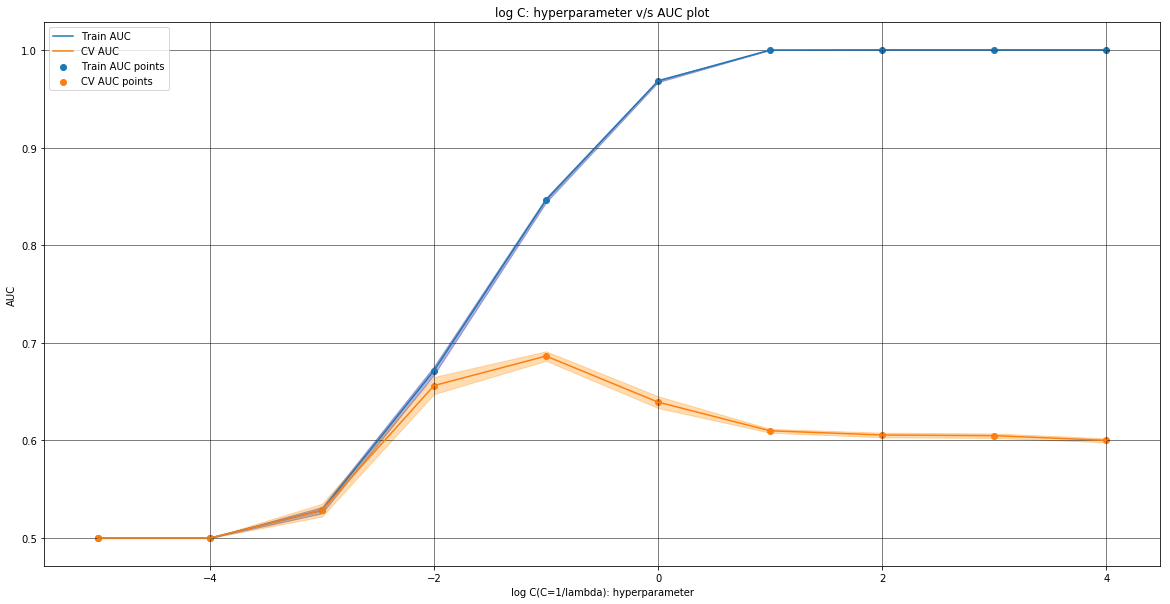

In [72]:
lr = LogisticRegression(penalty='l1',class_weight='balanced')

C=[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
parameters = {'C':[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

clf = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

log_c=[]
for a in tqdm(C):
    b = np.log10(a)
    log_c.append(b)

plt.figure(figsize=(20,10))
print(log_c)
plt.plot(log_c, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_c, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_c, train_auc, label='Train AUC points')
plt.scatter(log_c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log C(C=1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("log C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Summary

1) Plotting of C in a range of 0.00001 to 1 for finding the best C.

2) We observe that as C approaches close to .1,both train AUC and cv AUC parallel.

3) Using best paramter method in grid search cv,found out the best hyper parameter as 0.1

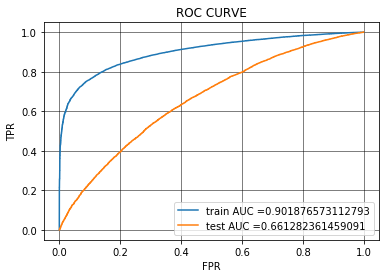

In [75]:
##Fitting Model to Hyper-Parameter Curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=0.1,class_weight='balanced');
neigh.fit(X_tr, y_train)

y_train_pred =neigh.predict_proba(X_tr )[:, 1]   
y_test_pred =neigh.predict_proba(X_te)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid(color='black', linestyle='-', linewidth=0.5)

### 4.1.2 Confusion matrix

In [76]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [77]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6884410593186183 for threshold 0.502
Train confusion matrix
[[ 6439   987]
 [ 8574 33041]]
Test confusion matrix
[[ 2714  2745]
 [ 8411 22182]]


In [78]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

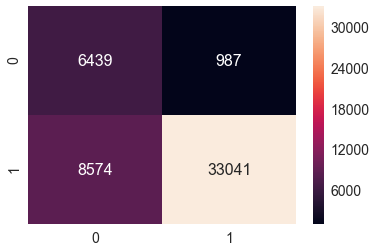

In [79]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [80]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

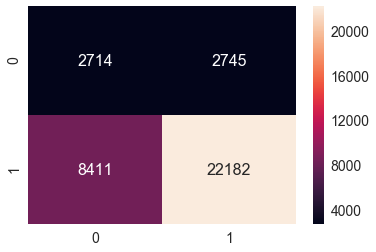

In [81]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

NameError: name 'X_te1' is not defined

## Summary

1) Applied Logistic Regression on the set having text data processed used bow,vectorzed categorical features and numerical features

2) Results showing the best hyper parameter as 0.1 

3) Got a test Auc score of 0.66.

## 3.2 SET 2

In [83]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_summary_tfidf,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr1 = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_summary_tfidf,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te1= hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_summary_tfidf,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
print(X_cr1.shape, y_cv.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 11765) (49041,)
(24155, 11765) (24155,)
(36052, 11765) (36052,)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.0min finished
100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


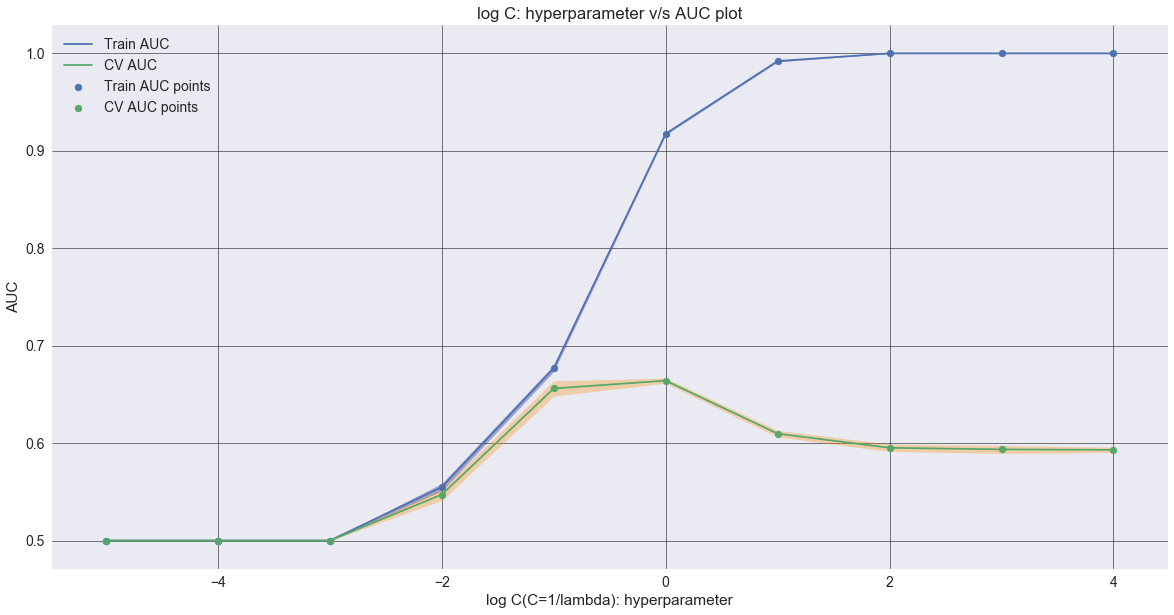

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',class_weight='balanced')

parameters = {'C':[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
C=[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
clf1 = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf1.fit(X_tr1, y_train)

train_auc1= clf1.cv_results_['mean_train_score']
train_auc_std1= clf1.cv_results_['std_train_score']
cv_auc1 = clf1.cv_results_['mean_test_score'] 
cv_auc_std1= clf1.cv_results_['std_test_score']

log_c=[]

for a in tqdm(C):
    b = np.log10(a)
    log_c.append(b)

plt.figure(figsize=(20,10))
print(log_c)

plt.plot(log_c, train_auc1, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,train_auc1 - train_auc_std1,train_auc1+ train_auc_std1,alpha=0.3,color='darkblue')

plt.plot(log_c, cv_auc1, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,cv_auc1 - cv_auc_std1,cv_auc1 + cv_auc_std1,alpha=0.3,color='darkorange')

plt.scatter(log_c, train_auc1, label='Train AUC points')
plt.scatter(log_c, cv_auc1, label='CV AUC points')


plt.legend()
plt.xlabel("log C(C=1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("log C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Summary

1) Plotting of C in a range of 0.00001 to 1000 for finding the best C.

2) We observe that as C approaches close to 1 ,both train AUC and cv AUC parallel.

3) Using best paramter method in grid search cv,found out the best hyper parameter as 1

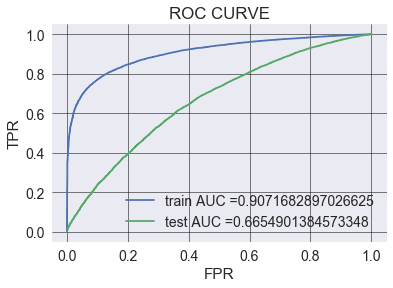

In [86]:
##Fitting Model to Hyper-Parameter Curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh1 = LogisticRegression(C=1,class_weight='balanced');
neigh1.fit(X_tr1, y_train)

y_train_pred1 =neigh1.predict_proba(X_tr1 )[:, 1]   
y_test_pred1 =neigh1.predict_proba(X_te1)[:, 1]

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid(color='black', linestyle='-', linewidth=0.5)

In [87]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t1 = find_best_threshold(tr_thresholds1, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t1)))

the maximum value of tpr*(1-fpr) 0.6967955298235312 for threshold 0.508
Train confusion matrix
[[ 6513   913]
 [ 8553 33062]]
Test confusion matrix
[[ 2782  2677]
 [ 8347 22246]]


In [88]:
conf_matr_df_train1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t1)))
sns.set(font_scale=1.4)#for label size


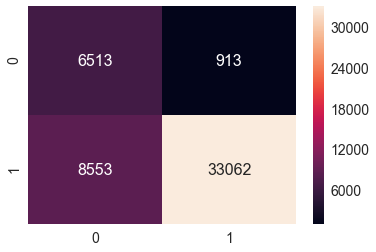

In [89]:
sns.heatmap(conf_matr_df_train1, annot=True,annot_kws={"size": 16}, fmt='g')
conf_matr_df_test1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t1)))

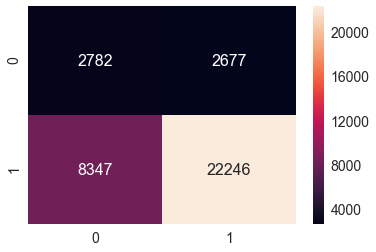

In [90]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test1, annot=True,annot_kws={"size": 16}, fmt='g')


## Summary


1) Applied Logistic Regression on the set having text data processed used tfidf,vectorzed categorical features and numerical features

2) Results showing the best hyper parameter as 1 

3) Got a test Auc score of 0.66.

## 3.4 SET 3

### Concatinating all the features-SET 3

In [91]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((train_w2v_vectors_essays,train_w2v_vectors_titles,train_w2v_vectors_summary,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr2 = hstack((cv_w2v_vectors_essays,cv_w2v_vectors_titles,cv_w2v_vectors_summary,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te2 = hstack((test_w2v_vectors_essays,test_w2v_vectors_titles,test_w2v_vectors_summary,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 252) (49041,)
(24155, 252) (24155,)
(36052, 252) (36052,)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 110.4min finished
100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 9969.82it/s]


[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


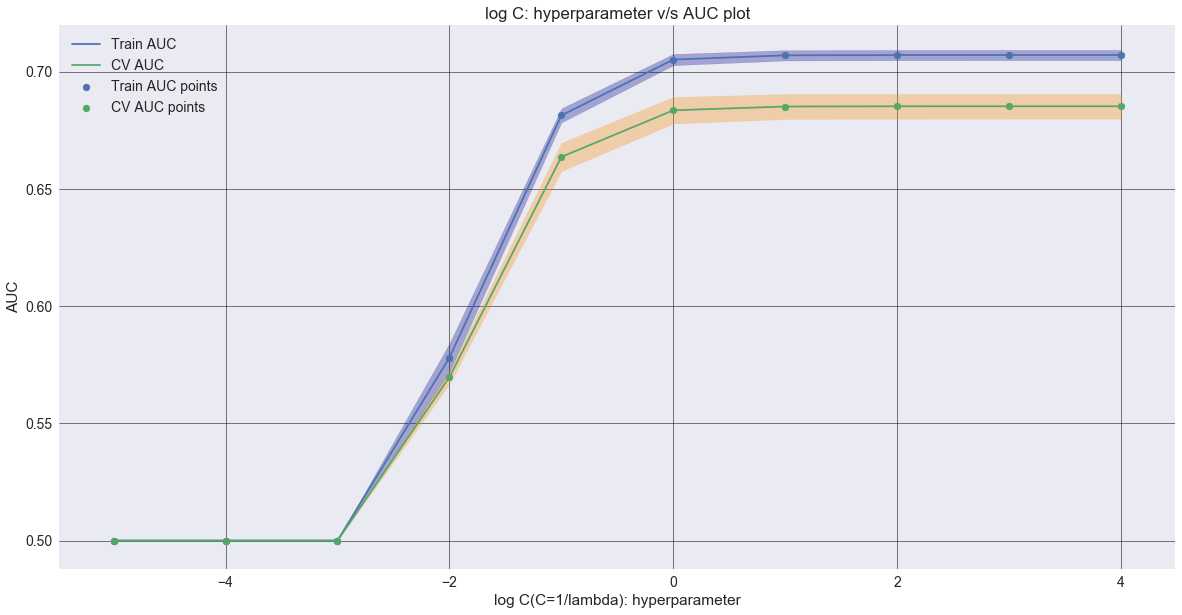

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',class_weight='balanced')

parameters = {'C':[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
C=[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

clf2 = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf2.fit(X_tr2, y_train)

train_auc2= clf2.cv_results_['mean_train_score']
train_auc_std2= clf2.cv_results_['std_train_score']
cv_auc2 = clf2.cv_results_['mean_test_score'] 
cv_auc_std2= clf2.cv_results_['std_test_score']

log_c=[]
for a in tqdm(C):
    b = np.log10(a)
    log_c.append(b)

plt.figure(figsize=(20,10))
print(log_c)

plt.plot(log_c, train_auc2, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,train_auc2 - train_auc_std2,train_auc2+ train_auc_std2,alpha=0.3,color='darkblue')

plt.plot(log_c, cv_auc2, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,cv_auc2 - cv_auc_std2,cv_auc2 + cv_auc_std2,alpha=0.3,color='darkorange')

plt.scatter(log_c, train_auc2, label='Train AUC points')
plt.scatter(log_c, cv_auc2, label='CV AUC points')


plt.legend()
plt.xlabel("log C(C=1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("log C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Summary

1) Plotting of C in a range of 0.00001 to 10000 for finding the best C.

2) We observe that as C approaches close to 1,both train AUC and cv AUC parallel.

3) Using best paramter method in grid search cv,found out the best hyper parameter as 1


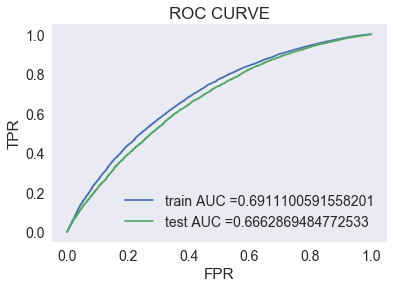

In [94]:


##Fitting Model to Hyper-Parameter Curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh2 = LogisticRegression(C=1,class_weight='balanced');
neigh2.fit(X_tr2, y_train)

y_train_pred2 =neigh2.predict_proba(X_tr2 )[:, 1]   
y_test_pred2 =neigh2.predict_proba(X_te2)[:, 1]

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()

In [95]:

print("="*100)
from sklearn.metrics import confusion_matrix
best_t2 = find_best_threshold(tr_thresholds2, train_fpr2, train_tpr2)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred2, best_t2)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t2)))

the maximum value of tpr*(1-fpr) 0.41018669883755776 for threshold 0.494
Train confusion matrix
[[ 4666  2760]
 [14448 27167]]
Test confusion matrix
[[ 3267  2192]
 [10831 19762]]


In [96]:
conf_matr_df_train2 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred2, best_t2)))
sns.set(font_scale=1.4)#for label size


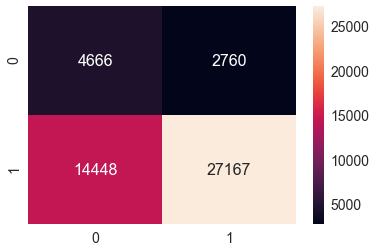

In [97]:

sns.heatmap(conf_matr_df_train2, annot=True,annot_kws={"size": 16}, fmt='g')
conf_matr_df_test2 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t2)))


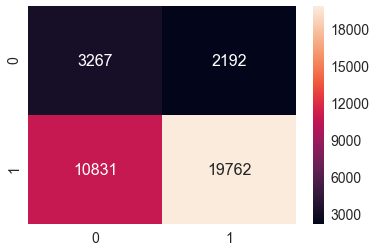

In [98]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test2, annot=True,annot_kws={"size": 16}, fmt='g')


## Summary


1) Applied Logistic Regression on the set having text data processed used W2V,vectorzed categorical features and numerical features

2) Results showing the best hyper parameter as 1

3) Got a test Auc score of 0.66

## 3.5 SET 4

### Concatinating all the features-SET 4

In [99]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr3 = hstack((train_tfidf_w2v_essays,train_tfidf_w2v_titles,train_tfidf_w2v_summary,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr3 = hstack((cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,cv_tfidf_w2v_summary,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te3 = hstack((test_tfidf_w2v_essays,test_tfidf_w2v_titles,test_tfidf_w2v_summary,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
print(X_cr3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 252) (49041,)
(24155, 252) (24155,)
(36052, 252) (36052,)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.1s
[CV] C

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 217.6min finished
100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 6238.74it/s]


[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


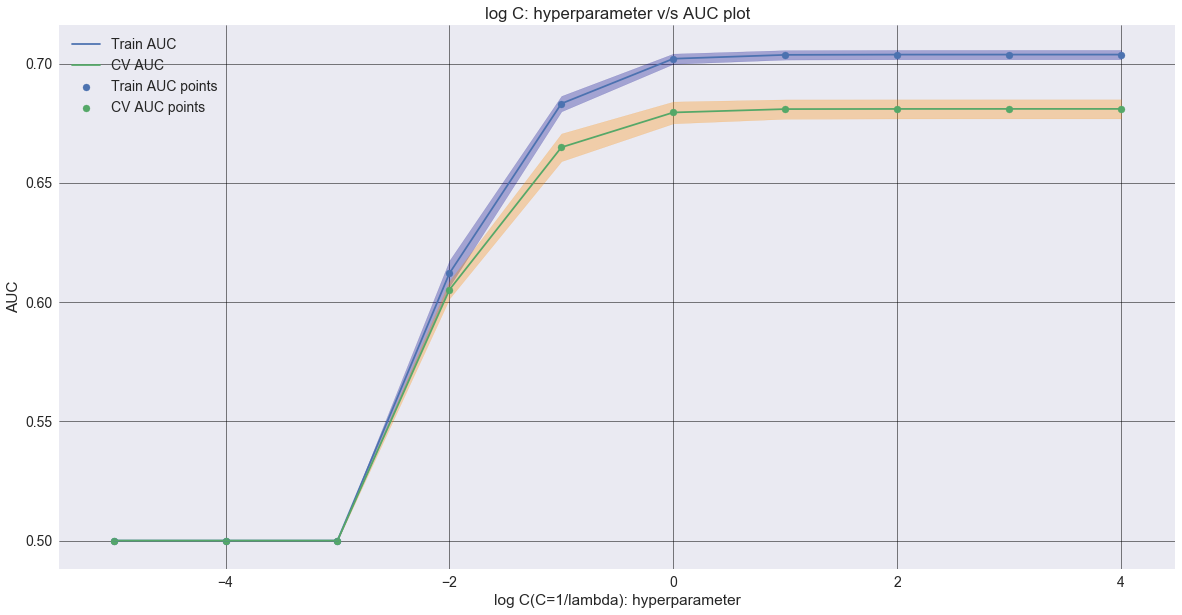

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',class_weight='balanced')

parameters = {'C':[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
C=[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

clf3 = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf3.fit(X_tr3, y_train)

train_auc3= clf3.cv_results_['mean_train_score']
train_auc_std3= clf3.cv_results_['std_train_score']
cv_auc3 = clf3.cv_results_['mean_test_score'] 
cv_auc_std3= clf3.cv_results_['std_test_score']


log_c=[]
for a in tqdm(C):
    b = np.log10(a)
    log_c.append(b)

plt.figure(figsize=(20,10))
print(log_c)

plt.plot(log_c,train_auc3, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,train_auc3 - train_auc_std3,train_auc3+ train_auc_std3,alpha=0.3,color='darkblue')

plt.plot(log_c, cv_auc3, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,cv_auc3 - cv_auc_std3,cv_auc3 + cv_auc_std3,alpha=0.3,color='darkorange')

plt.scatter(log_c, train_auc3, label='Train AUC points')
plt.scatter(log_c, cv_auc3, label='CV AUC points')


plt.legend()
plt.xlabel("log C(C=1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("log C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Summary

1) Plotting of C in a range of 0.00001 to 1000 for finding the best C.

2) We observe that as C approaches close to 1 ,both train AUC and cv AUC parallel.

3) Using best paramter method in grid search cv,found out the best hyper parameter as 1


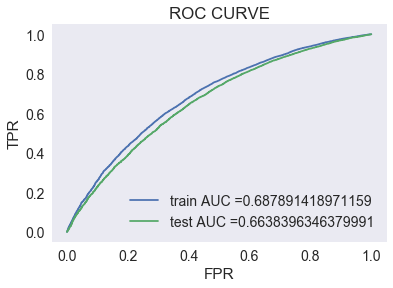

In [102]:


##Fitting Model to Hyper-Parameter Curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh3 = LogisticRegression(C=1,class_weight='balanced');
neigh3.fit(X_tr3, y_train)

y_train_pred3 =neigh3.predict_proba(X_tr3 )[:, 1]   
y_test_pred3 =neigh3.predict_proba(X_te3)[:, 1]

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()


In [103]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t3 = find_best_threshold(tr_thresholds3, train_fpr3, train_tpr3)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred3, best_t3)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred3, best_t3)))


the maximum value of tpr*(1-fpr) 0.40837063059189893 for threshold 0.482
Train confusion matrix
[[ 4543  2883]
 [13836 27779]]
Test confusion matrix
[[ 3243  2216]
 [10645 19948]]


In [104]:
conf_matr_df_train3 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred3, best_t3)))
sns.set(font_scale=1.4)#for label size


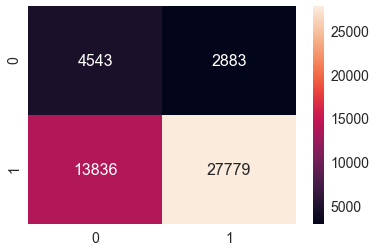

In [105]:
sns.heatmap(conf_matr_df_train3, annot=True,annot_kws={"size": 16}, fmt='g')
conf_matr_df_test3 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred3, best_t3)))



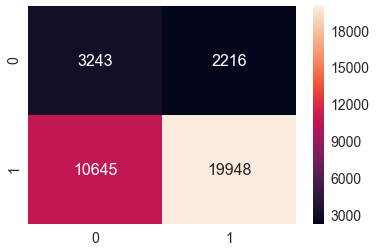

In [106]:

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test3, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary

1) Applied Logistic Regression on the set having text data processed used tfidf w2v,vectorzed categorical features and numerical features

2) Results showing the best hyper parameter as 1

3) Got a test Auc score of 0.66.

### Calculating number of words in Title

In [107]:
#Calculating number of words in title and adding that to project data

title_word_count = []
for a in project_data["clean_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count
project_data.head(5)


Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0           AZ   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           KY   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           TX   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   
2        2016-08-31 12:03:56   
3        2016-10-06 21:16:17   
4        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects   price  quantity  \
0                                             0  154.60        23   
1                                             7  299.00         1   
2                                             1  516.85        22   
3                                             4  232.90         4   
4                                             1   67.98         4   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

     clean_grade clean_prefix  \
0  Grades_PreK_2         Mrs.   
1     Grades_6_8          Mr.   
2     Grades_6_8          Ms.   
3  Grades_PreK_2         Mrs.   
4  Grades_PreK_2         Mrs.   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                        clean_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   
3  i work unique school filled esl english second...   
4  our second grade classroom next year made arou...   

                                       clean_title  title_word_count  
0        educational support english learners home                 5  
1                 wanted projector hungry learners                 4  
2  soccer equipment awesome middle school students                 6  
3                           techie kindergarteners                 2  
4                           interactive math tools                 3

#### Calculating words in essay

In [108]:
#Calculating number of words in essay and adding that to project title

essay_word_count=[]
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

project_data["essay_word_count"] = essay_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  price  quantity  \
0                                             0  154.6        23   
1                                             7  299.0         1   

               clean_categories           clean_subcategories    clean_grade  \
0             Literacy_Language                  ESL Literacy  Grades_PreK_2   
1  History_Civics Health_Sports  Civics_Government TeamSports     Grades_6_8   

  clean_prefix                                              essay  \
0         Mrs.  My students are English learners that are work...   
1          Mr.  Our students arrive to our school eager to lea...   

                                        clean_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   

                                 clean_title  title_word_count  \
0  educational support english learners home                 5   
1           wanted projector hungry learners                 4   

   essay_word_count  
0               161  
1               109

__ Computing Sentiment Scores__

In [109]:
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()


neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)


project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

100%|██████████████████████████████████████████████████████████████████████████| 109248/109248 [27:58<00:00, 65.10it/s]


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
#printing sample count of train,test and cv data for column id
print(X_train['id'].count())
print(X_test['id'].count())
print(X_cv['id'].count())
#Sample value of y in all types of data
print(y_train)
print(y_test)
print(y_cv)

49041
36052
24155
[1 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


#### Vectorizing word count in title

In [111]:
normalizer5 = Normalizer()

normalizer5.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer5.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer5.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer5.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Vectorizing essay word count

In [112]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)


After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Essay sentiments -positive

In [113]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(1,-1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)



After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Essay sentiments-negative

In [114]:

normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(1,-1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)


After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Essay sentiments neutral

In [115]:


normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(1,-1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)



After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### essay sentiments- compound

In [116]:


normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(1,-1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)




After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## SET 5

In [117]:
X_tr4 = hstack((X_train_state_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe,X_train_grade_ohe, X_train_teacher_ohe,X_train_qty_std,X_train_projects_std,X_train_price_std,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train,title_word_count_train,essay_word_count_train)).tocsr()
X_cr4 = hstack((X_cv_state_ohe,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_grade_ohe, X_cv_teacher_ohe,X_cv_qty_std , X_cv_projects_std,X_cv_price_std,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv,title_word_count_cv,essay_word_count_cv)).tocsr()
X_te4= hstack((X_test_state_ohe, X_test_clean_cat_ohe,X_test_clean_subcat_ohe,X_test_grade_ohe, X_test_teacher_ohe,X_test_qty_std,X_test_projects_std,X_test_price_std,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test,title_word_count_test,essay_word_count_test)).tocsr()


print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
print(X_cr4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 108) (49041,)
(24155, 108) (24155,)
(36052, 108) (36052,)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   1.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.2min finished
100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


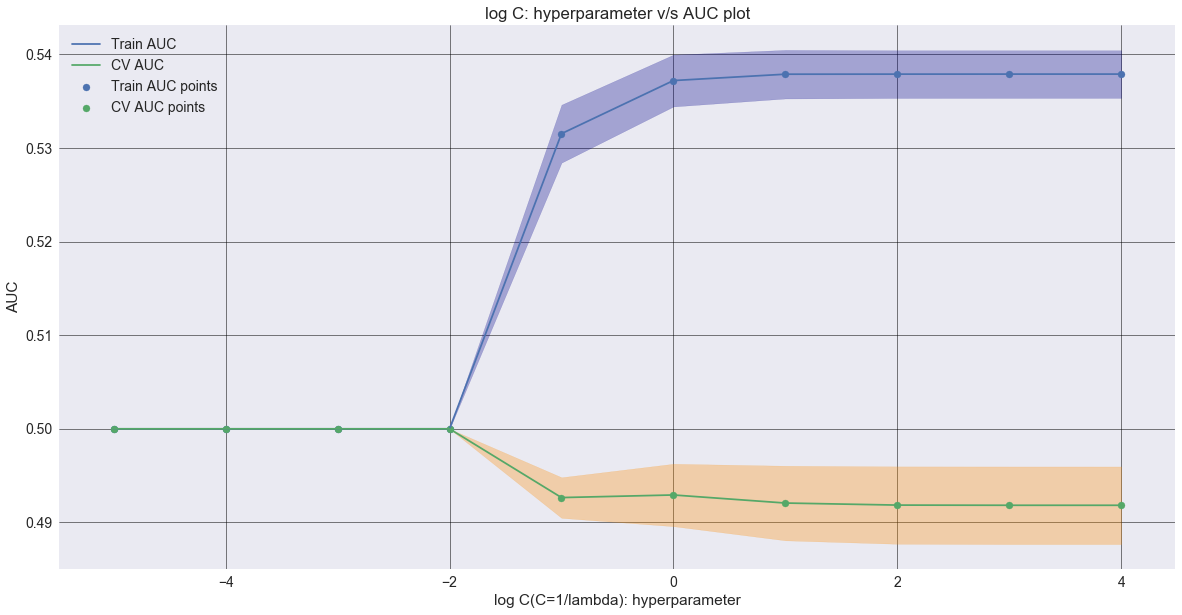

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',class_weight='balanced')

parameters = {'C':[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
C=[ 0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

clf4 = GridSearchCV(lr, parameters, cv= 3, scoring='roc_auc',return_train_score=True,verbose=2)

clf4.fit(X_tr4, y_train)

train_auc4= clf4.cv_results_['mean_train_score']
train_auc_std4= clf4.cv_results_['std_train_score']
cv_auc4 = clf4.cv_results_['mean_test_score'] 
cv_auc_std4= clf4.cv_results_['std_test_score']


log_c=[]
for a in tqdm(C):
    b = np.log10(a)
    log_c.append(b)

plt.figure(figsize=(20,10))
print(log_c)

plt.plot(log_c, train_auc4, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,train_auc4 - train_auc_std4,train_auc4+ train_auc_std4,alpha=0.3,color='darkblue')

plt.plot(log_c, cv_auc4, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_c,cv_auc4 - cv_auc_std4,cv_auc4 + cv_auc_std4,alpha=0.3,color='darkorange')

plt.scatter(log_c, train_auc4, label='Train AUC points')
plt.scatter(log_c, cv_auc4, label='CV AUC points')

plt.legend()
plt.xlabel("log C(C=1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("log C: hyperparameter v/s AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Summary

1) Plotting of C in a range of 0.00001 to 10000 for finding the best C.

2) We observe that as C approaches close to .1,both train AUC and cv AUC parallel.

3) Using best paramter method in grid search cv,found out the best hyper parameter as 0.1

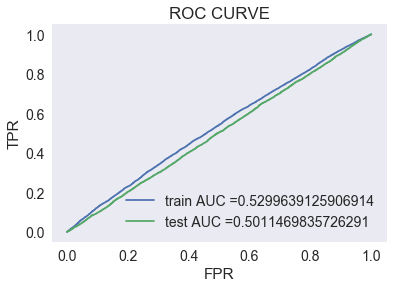

In [119]:


##Fitting Model to Hyper-Parameter Curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh4 = LogisticRegression(C=0.1,class_weight='balanced');
neigh4.fit(X_tr4, y_train)

y_train_pred4 =neigh4.predict_proba(X_tr4 )[:, 1]   
y_test_pred4 =neigh4.predict_proba(X_te4)[:, 1]

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()

In [120]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t4 = find_best_threshold(tr_thresholds4, train_fpr4, train_tpr4)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred4, best_t4)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred4, best_t4)))

the maximum value of tpr*(1-fpr) 0.2714438869455329 for threshold 0.499
Train confusion matrix
[[ 3814  3612]
 [19621 21994]]
Test confusion matrix
[[ 2589  2870]
 [14394 16199]]


In [121]:
conf_matr_df_train4 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred4, best_t4)))
sns.set(font_scale=1.4)#for label size

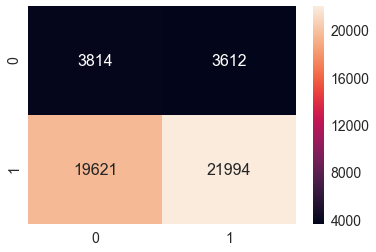

In [122]:
sns.heatmap(conf_matr_df_train4, annot=True,annot_kws={"size": 16}, fmt='g')
conf_matr_df_test4 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred4, best_t4)))

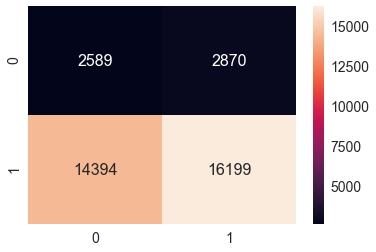

In [123]:

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test4, annot=True,annot_kws={"size": 16}, fmt='g')

## Summary


1) Applied Logistic Regression on the set having vectorzed categorical features and numerical features.Numerical features including vectorized number of words in essay and titles,sentiment scores of essays

2) Results showing the best hyper parameter as 0.1 

3) Got a test Auc score of 0.50.

<h1>3. Conclusion</h1>

In [124]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]

x.add_row(["BOW", "Logistic Regression", 0.1, 0.66])
x.add_row(["TFIDF", "Logistic Regression", 1, 0.66])
x.add_row(["AVG W2V", "Logistic Regression", 1, 0.66])
x.add_row(["TFIDF W2V", "Logistic Regression", 1, 0.66])
x.add_row(["WITHOUT TEXT", "Logistic Regression", 0.1, 0.50])


print(x)

+--------------+---------------------+-----------------------+------+
|  Vectorizer  |        Model        | Alpha:Hyper Parameter | AUC  |
+--------------+---------------------+-----------------------+------+
|     BOW      | Logistic Regression |          0.1          | 0.66 |
|    TFIDF     | Logistic Regression |           1           | 0.66 |
|   AVG W2V    | Logistic Regression |           1           | 0.66 |
|  TFIDF W2V   | Logistic Regression |           1           | 0.66 |
| WITHOUT TEXT | Logistic Regression |          0.1          | 0.5  |
+--------------+---------------------+-----------------------+------+


## Summary

We observe that bow,tfidf,avg w2v,tfidf w2v  have almost same test AUC scores in and around 0.66

The set with no text features does not perform well as compared to other sets with lowest AUC of 0.50, so we conclude that text features are essential